In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import statsmodels.formula.api as sfa
import statsmodels.api as sma

import warnings
warnings.filterwarnings('ignore')

## What is regression?

* Regression generally means “stepping back towards the average”.
* Regression analysis is also defined as the measure of average relationship between two or more variables.
* The predicted variable is known as dependent/target/response.
* The variable(s) which is used for prediction is known as independent/explanatory/regressor.

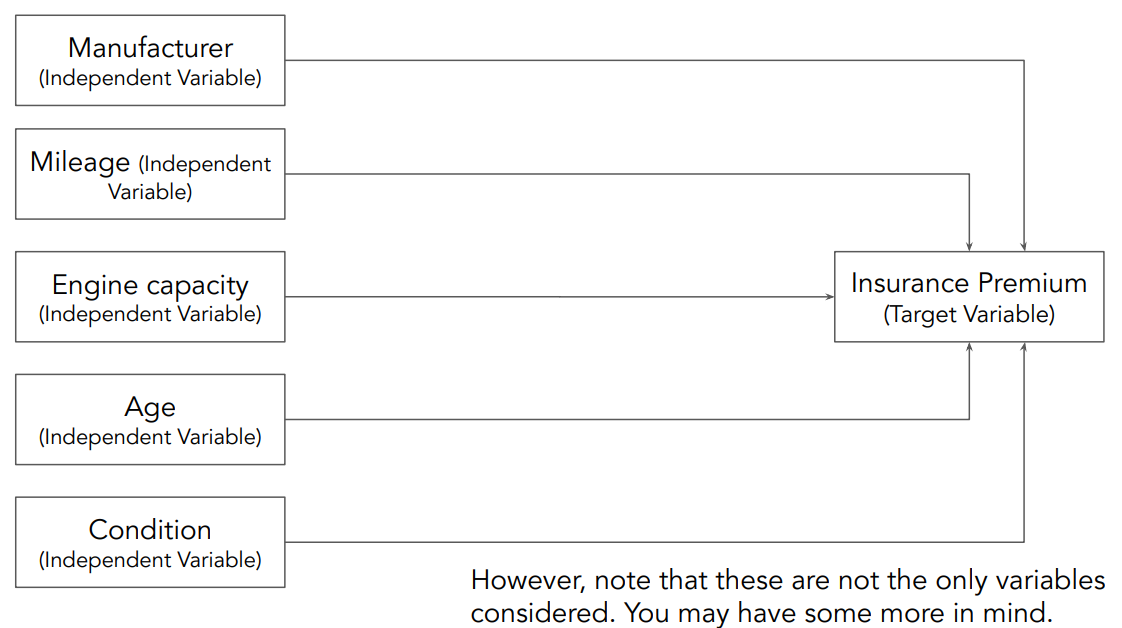

* Regression analysis allows us to examine which independent variables have an impact on the dependent variable
* Regression analysis investigates and models the relationship between variables
* Determine which independent variables can be ignored, which ones are most important and how they influence each other

## What is linear regression?

●Linear regression is one of the supervised learning algorithms that are used to identify a relationship between two or more variables.

● This relationship can be used to predict values for one variable, if value(s) of other variable(s) is given.

● A simple linear regression model (also called bivariate regression) has one independent variable X
that has a linear relationship with the dependent variable Y.

y = β0 + β1x + ε

Here β0 and β1 are the parameters of the linear regression model.

In [37]:
salary = pd.read_csv('Salary_dataset.csv')

In [38]:
salary

,YearsExperience,Salary
0,1.2,39344
1,1.4,46206
2,1.6,37732
3,2.1,43526
4,2.3,39892
5,3.0,56643
6,3.1,60151
7,3.3,54446
8,3.3,64446
9,3.8,57190


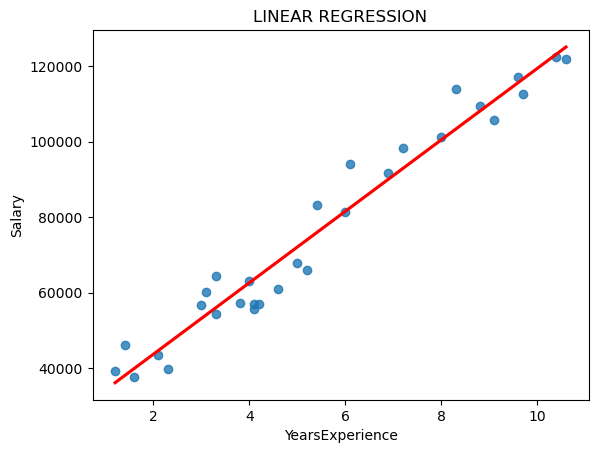

In [39]:
sns.regplot(x=salary['YearsExperience'],y=salary['Salary'],line_kws={'color':'r'},ci=0)
plt.title('LINEAR REGRESSION')
plt.show()

y = β0 + β1x + ε

y = set of values taken by dependent variable Y

x = set of values taken by independent variable X

β0 = y intercept

β1 = slope 

ε = random error component

## What is error term? Calculating error term.

Error term also called residual represents the distance of the observed value from the value
predicted by regression line.

● In our example,

Error term = Actual Salary - Predicted Salary

for each observation

Equation of regression line is given by, y = β0 + β1x + ε

● Error term can be calculated as, ε = y - (β0 + β1x)

● We have an error term for every observation in the data.
εi = yactual - ypredicted

● Squared error : εi
2 = (yactual- ypredicted)2

● Sum of squared errors = ∑ εi
2

## Which Line is best fit line?

● The regression line which best explains the trend in the data is the best fit line

● The line with the least error will be chosen as the best fitting line

### Methods to get best fit line

* OLS (Ordinary Least Squares Method) **
* Gradient Descent

### Ordinary Least Squares Method

● The ordinary least square method is used to find the best fit line for given data.

● This method aims at minimizing the sum of squares of the error terms, that is, it determines those
values of β0 and β1 at which the error terms are minimum.

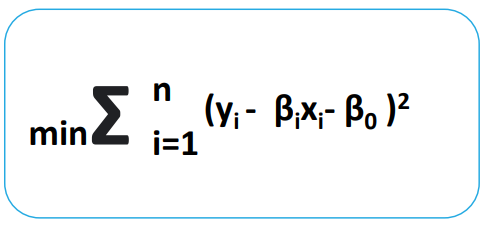

### Math Behind OLS

● We have seen that the error term ε = y - (β0 + β1x)

● The OLS method minimizes E = ∑ε2 = ∑(y - (β0 + β1x))2

● To minimize the error we take partial derivatives with respect to β0 and β1 and equate them to zero.

δE/δβ0 = 0

δE/δβ1 = 0

● So we get two equations with two unknowns, β0 and β1

● So we get:

δE/δβ0 = ∑ 2 (y - β0 - β1x) (-1) = 0

δE/δβ1 = ∑ 2 (y - β0 - β1x)) (-x) = 0

● Expanding these equations, we get β0 and β1 as:

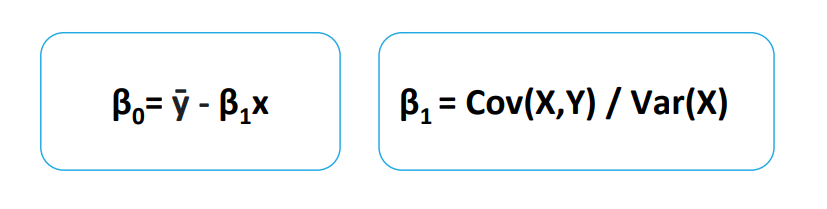

### Q. Find the parameters for above dataset and create the Linear Regression Model to predict "Salary". Also find the sum of squares of error.

#### Calculate the slop b1

In [40]:
x = salary['YearsExperience']
y = salary['Salary']

x_bar = np.mean(x)
y_bar = np.mean(y)

# b1= sum((xi-x_bar)*(yi-y_bar))/sum((xi-x_bar)^2)

nume = np.sum((x-x_bar)*(y-y_bar))
deno = np.sum((x-x_bar)**2)

b1 = nume/deno
print('slope b1: ',b1)

slope b1:  9449.962321455076


#### Calculating interscept b1

In [41]:
# b0 = y_bar b1*x_bar
b0 = y_bar - (b1*x_bar)
print('Interscept b0: ',b0)

Interscept b0:  24848.2039665232


#### Model
##### predicted salary = 24848.20 + 9449.96 * year experience

In [42]:
# For fresher (or 0 experince) has average salary of 24848.20
# For 1 year increase in experience gives the avg salary increase of 9449.96

#### Predicting the Salary

In [43]:
salary['salary_pred']= b0 + b1 * salary ['YearsExperience']
salary.head()

,YearsExperience,Salary,salary_pred
0,1.2,39344,36188.158752
1,1.4,46206,38078.151217
2,1.6,37732,39968.143681
3,2.1,43526,44693.124842
4,2.3,39892,46583.117306


In [44]:
salary['residual'] = salary['Salary']-salary['salary_pred']
salary.head()

,YearsExperience,Salary,salary_pred,residual
0,1.2,39344,36188.158752,3155.841248
1,1.4,46206,38078.151217,8127.848783
2,1.6,37732,39968.143681,-2236.143681
3,2.1,43526,44693.124842,-1167.124842
4,2.3,39892,46583.117306,-6691.117306


#### SSE(Sum of squared errors)

In [45]:
SSE= np.sum((salary['residual'])**2)
print('SSE: ',SSE)

SSE:  938128551.6684287


#### Visualize the model

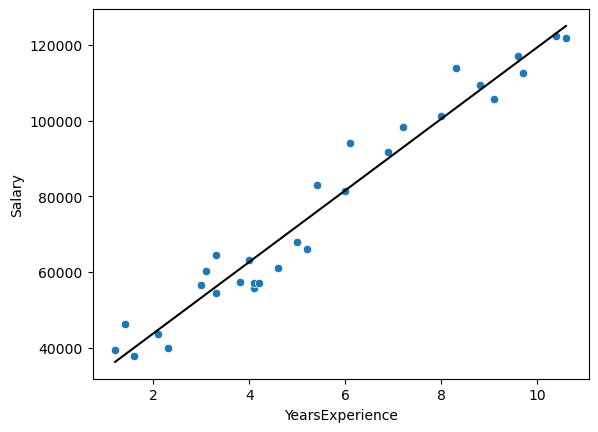

In [46]:
sns.scatterplot(x=x,y=y)
plt.plot(x,salary['salary_pred'],color='k')
plt.show()

In [47]:
model= sfa.ols('Salary~YearsExperience',data=salary).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 14 Dec 2023   Prob (F-statistic):           1.14e-20
Time:                        20:34:19   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.485e+04   2306.654     10.772      0.000    2.01e+04    2.96e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
 model.params

Intercept          24848.203967
YearsExperience     9449.962321
dtype: float64

<Axes: xlabel='YearsExperience', ylabel='Salary'>

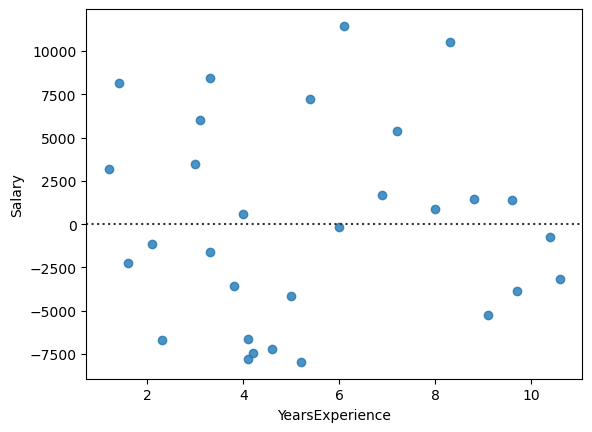

In [49]:
sns.residplot(x=x,y=y)

## Measures Of Variation

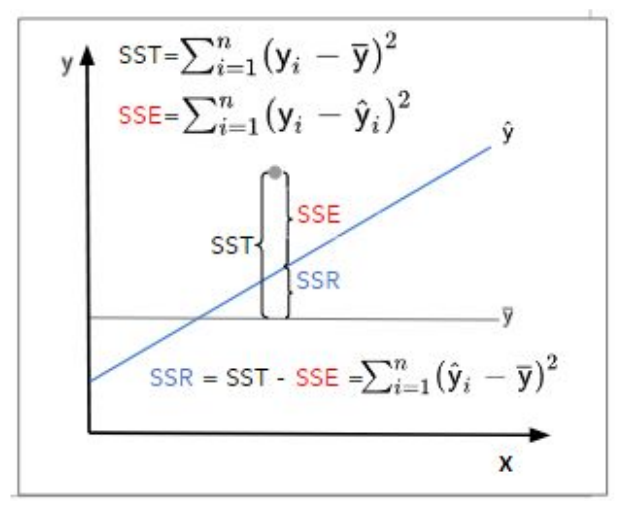

 yi = observed values of y
 
 y_hat = predicted values of y
 
 y_bar = mean value of variable y

### Q. Calculate SSE, SST and SSR for the above model

In [50]:
yi = y
y_hat = salary['salary_pred']
y_bar= y_bar

print('SSE:', SSE)

SST= np.sum((yi-y_bar)**2)
print('SST:', SST)

SSR = SST - SSE
print('SSR: ',SSR)

SSE: 938128551.6684287
SST: 21794977852.0
SSR:  20856849300.33157


### Measure of unexplained variance

● Standard error of estimate is a measure of the unexplained variance

● Smaller value of standard error of estimate indicates a better model

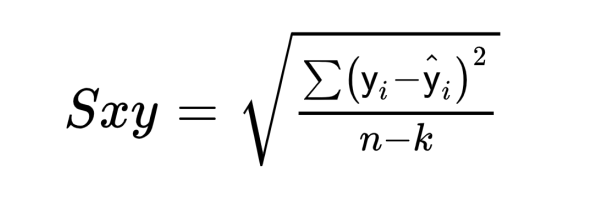

In [54]:
## Standard error SE (for the model)
# SE = sqrt(SSE/n-k)

n=salary.shape[0]
k=2 # is to include both b0 and b1 

SE= np.sqrt(SSE/(n-k))
print('Standard error of model: ',SE)

Standard error of model:  5788.3150511193935


### Measure of explained variation 

R2 also called the coefficient of determination gives total percentage of variation in Y that is explained by predictor variable.

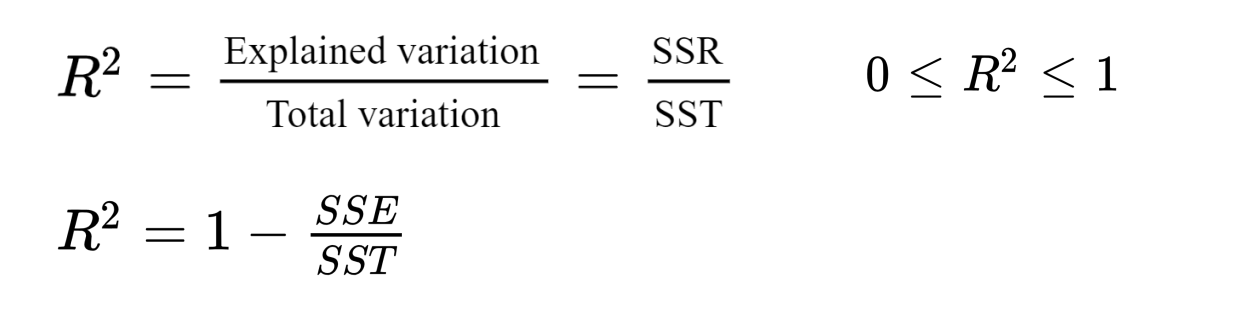

In [55]:
# Calculate the R2

R2 = SSR/SST
print('R2: ', R2)

R2:  0.9569566641435084


## Statistical Inference about model

### Statistical Test for Slope

● For a existence of a linear relationship β1 > 0, to test

H0 : β1 = 0 against 

H1 : β1 ≠ 0

● It implies
 
H0 : There is no relationship between variables X and Y, against 

H1 : There is relationship between variables X and Y The t test for slope

● Failing to reject H0 implies that there is no relationship between X and Y


#### T -statistic

Statistical Inference about the Model - Testing the Slope:

Imagine you have a model that predicts something (let's say ice cream sales) based on a variable (like temperature). The model has a slope (β1) that tells you how much the predicted values change when the variable changes.

Now, we want to test whether there's a real relationship between temperature and ice cream sales.

Null Hypothesis (H0):

H0 says there's no relationship between temperature and ice cream sales. In other words, the slope (β1) in our model is zero.


Alternative Hypothesis (H1):

H1 says there is a relationship between temperature and ice cream sales. The slope (β1) is not zero.
In simpler terms:
H0: No relationship.
H1: There is a relationship.


T Test for Slope:

We use a statistical test called the t test to check if the slope is significantly different from zero.
If the t test shows that the slope is significantly different from zero, we have evidence to support 
H1 – meaning there is a real relationship.



Interpretation:

If we fail to reject H0, it means we don't have enough evidence to say there is a relationship between temperature and ice cream sales.

If we reject H0, it means we have evidence that there is a relationship between temperature and ice cream sales.

In [59]:
nume= SE
deno= np.sqrt(np.sum((x - x_bar)**2))

SE_b1= nume/deno
print('SE of b1: ', SE_b1)
print('SE of b1: ',model.bse[1])

tstat_b1 = b1/SE_b1
print('test statistic: ', tstat_b1)

SE of b1:  378.75457423882096
SE of b1:  378.7545742388211
test statistic:  24.950094240964784


#### p value at test statistic

In [62]:
dof = n - k - 1
p_value = (1- stats.t.cdf(tstat_b1,dof))*2
print('p value: ', p_value)

p value:  0.0


In [65]:
if p_value < 0.05:
    print('Reject Ho: ')
else:
    print('Fail to reject Ho:')

Reject Ho: 


#### Slop Interval 

In [66]:
# b1 - tcrit*SE  to b1 + tcrit*SE
stats.t.interval(0.95,loc=b1,scale=SE_b1,df=dof)

(8672.822127775366, 10227.102515134786)

### Statistical Test for Intercept


H0 : The parameter β0 is not significant against 

H1 : The parameter β0 is significant

In [72]:
# T-Static 

SE_bo= model.bse[0]
b0= model.params[0]

tstat_b0 = b0/SE_bo

print('Intercept:', b0)
print('SE in Intercept:', SE_bo)
print('t Statistic: ', tstat_b0)

Intercept: 24848.203966523186
SE in Intercept: 2306.6537090650045
t Statistic:  10.772403273569545


In [78]:
n = salary.shape[0]
k=2

dof = n-k-1
p_val = (1-stats.t.cdf(tstat_b0,dof))*2
print('P_value:', p_val)

if p_value < 0.05:
    print('Reject Ho: ')
else:
    print('Fail to reject Ho:')

P_value: 2.8104851779175988e-11
Reject Ho: 


In [77]:
# Interval of intercept
stats.t.interval(0.95,loc = b0, scale = SE_bo,df=dof)

(20115.34149531118, 29581.066437735193)

### Statistical test for Model (ANOVA for regression)

H0 : The regression model is not significant against 

H1 : The regression model is significant

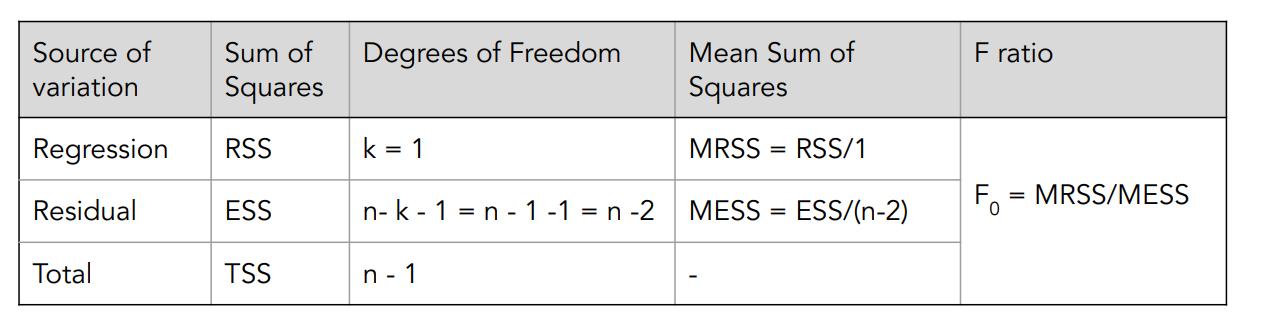

● Decision rule: Reject H0, if F0 > F(1,n-2),α or if the p-value is less than the α (level of significance)

● Failure to reject H0 implies that the model is not significant


In [79]:
# F-statistic

k = 1 # DF of model (How many independent variables we are considering)
n= salary.shape[0]

dfn=k
dfd= n-k-1

MRSS=SSR/dfn
MESS = SSE/dfd

f_stat = MRSS/MESS
print('f statistic of model', f_stat)

f statistic of model 622.5072026330241


In [81]:
# p value
p_value= 1-stats.f.cdf(f_stat,dfn=dfn,dfd=dfd)
print('p_value', p_value)

p_value 1.1102230246251565e-16


In [82]:
if p_value < 0.05:
    print('Reject Ho: ')
else:
    print('Fail to reject Ho:')

Reject Ho: 
